In [1]:
from pyspark.sql.types import *

In [2]:
customSchema = StructType([
    StructField("Primary_Index", IntegerType(), True), 
    StructField("Tweet_Id", StringType(), True), 
    StructField("Date_Text", StringType(), True),
    StructField("Flag", StringType(), True), 
    StructField("User", StringType(), True),
    StructField("Tweet_Text", StringType(), True)])

df = spark.read.load('hdfs://localhost:9000/CA2/ProjectTweets.csv', format="csv", header="False", sep=',', schema=customSchema)


In [3]:
##Remove commas from the Tweet Text field
##First test an example

In [4]:
filtered_df = df.filter(df["Tweet_Id"] == '1467811594')
# Select only the "Tweet_Text" column from the filtered DataFrame
result = filtered_df.select("Tweet_Text")

# Show the content of column "Tweet_Text"
result.show(truncate=False)

+---------------------------------------------------------------------------------------------------+
|Tweet_Text                                                                                         |
+---------------------------------------------------------------------------------------------------+
|@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?|
+---------------------------------------------------------------------------------------------------+



In [5]:
##Then strip the commas out

In [6]:
from pyspark.sql.functions import regexp_replace
# Remove commas from the "Tweet_Text" column

filtered_df = df.filter(df["Tweet_Id"] == '1467811594')

filtered_df = filtered_df.withColumn("Tweet_Text", regexp_replace(filtered_df["Tweet_Text"], ",", ""))

# Select only the "Tweet_Text" column from the filtered DataFrame
result = filtered_df.select("Tweet_Text")

# Show the content of column "Tweet_Text"
result.show(truncate=False)

+------------------------------------------------------------------------------------------------+
|Tweet_Text                                                                                      |
+------------------------------------------------------------------------------------------------+
|@LOLTrish hey  long time no see! Yes.. Rains a bit only a bit  LOL  I'm fine thanks  how's you ?|
+------------------------------------------------------------------------------------------------+



In [7]:
##Now do it with all the rows

In [8]:
df = df.withColumn("Tweet_Text", regexp_replace(df["Tweet_Text"], ",", ""))

In [9]:
filtered_df = df.filter(df["Tweet_Id"] == '1467811594')
# Select only the "Tweet_Text" column from the filtered DataFrame
result = filtered_df.select("Tweet_Text")

# Show the content of column "Tweet_Text"
result.show(truncate=False)

+------------------------------------------------------------------------------------------------+
|Tweet_Text                                                                                      |
+------------------------------------------------------------------------------------------------+
|@LOLTrish hey  long time no see! Yes.. Rains a bit only a bit  LOL  I'm fine thanks  how's you ?|
+------------------------------------------------------------------------------------------------+



In [10]:

# Calculate the max length of each column
from pyspark.sql.functions import max, length
max_lengths = []

for column_name in df.columns:
    max_length = df.agg(max(length(column_name))).collect()[0][0]
    max_lengths.append((column_name, max_length))

# Display the results
for col, max_len in max_lengths:
    print(f"Max length of {col}: {max_len}")

Max length of Primary_Index: 7
Max length of Tweet_Id: 10
Max length of Date_Text: 28
Max length of Flag: 8
Max length of User: 15
Max length of Tweet_Text: 374


In [11]:
from pyspark.sql.functions import col, sum

# Count null values in each column
null_counts = []

for column_name in df.columns:
    count = df.select(column_name).where(col(column_name).isNull()).count()
    null_counts.append((column_name, count))

# Display the results
for col, count in null_counts:
    print(f"Number of null values in {col}: {count}")

Number of null values in Primary_Index: 0
Number of null values in Tweet_Id: 0
Number of null values in Date_Text: 0
Number of null values in Flag: 0
Number of null values in User: 0
Number of null values in Tweet_Text: 0


In [12]:
from pyspark.sql.functions import countDistinct

# Calculate the number of unique values in each column
unique_counts = []

for column_name in df.columns:
    count = df.agg(countDistinct(column_name)).collect()[0][0]
    unique_counts.append((column_name, count))

# Display the results
for col, count in unique_counts:
    print(f"Number of unique values in {col}: {count}")

Number of unique values in Primary_Index: 1600000
Number of unique values in Tweet_Id: 1598315
Number of unique values in Date_Text: 774363
Number of unique values in Flag: 1
Number of unique values in User: 659775
Number of unique values in Tweet_Text: 1581312


In [13]:
from pyspark.sql.functions import col
# Find and display an example record with duplicated "Tweet_Id"
duplicate_tweet_id_example = df.groupBy("Tweet_Id").count().filter(col("count") > 1).limit(1)

# Display the result
duplicate_tweet_id_example.show()

+----------+-----+
|  Tweet_Id|count|
+----------+-----+
|1469531660|    2|
+----------+-----+



In [14]:
# Find and display all records with the Tweet_Id "1469531660"
matching_records = df.filter(col("Tweet_Id") == "1469531660")

# Display the matching records
matching_records.show(truncate=False)

+-------------+----------+----------------------------+--------+------------+-----------------------------------------------------------------+
|Primary_Index|Tweet_Id  |Date_Text                   |Flag    |User        |Tweet_Text                                                       |
+-------------+----------+----------------------------+--------+------------+-----------------------------------------------------------------+
|6730         |1469531660|Tue Apr 07 06:39:53 PDT 2009|NO_QUERY|appleaddicto|Company blocked Twitter today  oh well i still have it on mobile |
|809639       |1469531660|Tue Apr 07 06:39:53 PDT 2009|NO_QUERY|appleaddicto|Company blocked Twitter today  oh well i still have it on mobile |
+-------------+----------+----------------------------+--------+------------+-----------------------------------------------------------------+



In [15]:
# Create a DataFrame with unique records
unique_records_df = df.dropDuplicates(["Tweet_Id", "Date_Text", "Flag", "User", "Tweet_Text"])


In [16]:
# Calculate the number of unique values in each column
unique_counts = []

for column_name in df.columns:
    count = unique_records_df.agg(countDistinct(column_name)).collect()[0][0]
    unique_counts.append((column_name, count))

# Display the results
for col, count in unique_counts:
    print(f"Number of unique values in {col}: {count}")

2023-10-29 21:10:06,473 WARN expressions.RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
2023-10-29 21:10:06,502 WARN expressions.RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
2023-10-29 21:10:07,120 WARN expressions.RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
2023-10-29 21:10:07,144 WARN expressions.RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


Number of unique values in Primary_Index: 1598315
Number of unique values in Tweet_Id: 1598315
Number of unique values in Date_Text: 774363
Number of unique values in Flag: 1
Number of unique values in User: 659775
Number of unique values in Tweet_Text: 1581312


In [17]:
from pyspark.sql.functions import col
# Find and display all records with the Tweet_Id "1469531660"
matching_records = unique_records_df.filter(col("Tweet_Id") == "1469531660")

# Display the matching records
matching_records.show(truncate=False)

2023-10-29 21:10:51,477 WARN expressions.RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
2023-10-29 21:10:51,484 WARN expressions.RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
2023-10-29 21:10:51,736 WARN expressions.RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
2023-10-29 21:10:51,744 WARN expressions.RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


+-------------+----------+----------------------------+--------+------------+-----------------------------------------------------------------+
|Primary_Index|Tweet_Id  |Date_Text                   |Flag    |User        |Tweet_Text                                                       |
+-------------+----------+----------------------------+--------+------------+-----------------------------------------------------------------+
|6730         |1469531660|Tue Apr 07 06:39:53 PDT 2009|NO_QUERY|appleaddicto|Company blocked Twitter today  oh well i still have it on mobile |
+-------------+----------+----------------------------+--------+------------+-----------------------------------------------------------------+



In [42]:
df = unique_records_df

In [31]:
from pyspark.sql.functions import col

df = unique_records_df.select("Tweet_Id", "Date_Text", "User","Tweet_Text", col("Tweet_Text").alias("Tweet_Text_Cleaned"))
df.show(10)

+----------+--------------------+--------------+--------------------+--------------------+
|  Tweet_Id|           Date_Text|          User|          Tweet_Text|  Tweet_Text_Cleaned|
+----------+--------------------+--------------+--------------------+--------------------+
|1467878557|Mon Apr 06 22:37:...|    tshamysboo|dierks bentley is...|dierks bentley is...|
|1467901424|Mon Apr 06 22:43:...|      duckyrat|This latest episo...|This latest episo...|
|1467918595|Mon Apr 06 22:48:...|     DanaSully|@DaveLindquist ca...|@DaveLindquist ca...|
|1467982795|Mon Apr 06 23:06:...|      TiffinyB|I am home missing...|I am home missing...|
|1468020773|Mon Apr 06 23:17:...| MalaysianLife|@daydreamer20 Goo...|@daydreamer20 Goo...|
|1468021367|Mon Apr 06 23:18:...|DanielChambers|Back on the 7am t...|Back on the 7am t...|
|1468023239|Mon Apr 06 23:18:...|   mayveleezet|day 2 is almost o...|day 2 is almost o...|
|1468036593|Mon Apr 06 23:22:...|      johnhays|@realchrissystar ...|@realchrissystar ...|

In [32]:
# Extract characters at positions 21, 22, and 23 and select unique values
from pyspark.sql.functions import substring
unique_characters = df.select(substring("Date_Text", 21, 3).alias("Date_Text_Characters")).distinct()

# Show the unique characters
unique_characters.show()

+--------------------+
|Date_Text_Characters|
+--------------------+
|                 PDT|
+--------------------+



In [33]:

df =df.withColumn("Year", df.Date_Text.substr(-4, 4))
df = df.withColumn("Month", df.Date_Text.substr(5, 3))
df = df.withColumn("Day", df.Date_Text.substr(9, 2))

In [22]:
df.show(10)

+----------+--------------------+--------------+--------------------+--------------------+----+-----+---+
|  Tweet_Id|           Date_Text|          User|          Tweet_Text|  Tweet_Text_Cleaned|Year|Month|Day|
+----------+--------------------+--------------+--------------------+--------------------+----+-----+---+
|1467878557|Mon Apr 06 22:37:...|    tshamysboo|dierks bentley is...|dierks bentley is...|2009|  Apr| 06|
|1467901424|Mon Apr 06 22:43:...|      duckyrat|This latest episo...|This latest episo...|2009|  Apr| 06|
|1467918595|Mon Apr 06 22:48:...|     DanaSully|@DaveLindquist ca...|@DaveLindquist ca...|2009|  Apr| 06|
|1467982795|Mon Apr 06 23:06:...|      TiffinyB|I am home missing...|I am home missing...|2009|  Apr| 06|
|1468020773|Mon Apr 06 23:17:...| MalaysianLife|@daydreamer20 Goo...|@daydreamer20 Goo...|2009|  Apr| 06|
|1468021367|Mon Apr 06 23:18:...|DanielChambers|Back on the 7am t...|Back on the 7am t...|2009|  Apr| 06|
|1468023239|Mon Apr 06 23:18:...|   mayveleeze

In [23]:
# Use the `distinct` method to get unique values in the "Month" column
unique_months = df.select("Month").distinct()

# Show the unique values
unique_months.show()

+-----+
|Month|
+-----+
|  May|
|  Jun|
|  Apr|
+-----+



In [34]:
from pyspark.sql.functions import when, lit

# Use the `when` and `lit` functions to replace values in the "Month" column
df = df.withColumn("Month", when(df["Month"] == "May", lit("05"))
                        .when(df["Month"] == "Apr", lit("04"))
                        .when(df["Month"] == "Jun", lit("06"))
                        .otherwise(df["Month"]))

# Show the updated DataFrame
df.show(10)

+----------+--------------------+--------------+--------------------+--------------------+----+-----+---+
|  Tweet_Id|           Date_Text|          User|          Tweet_Text|  Tweet_Text_Cleaned|Year|Month|Day|
+----------+--------------------+--------------+--------------------+--------------------+----+-----+---+
|1467878557|Mon Apr 06 22:37:...|    tshamysboo|dierks bentley is...|dierks bentley is...|2009|   04| 06|
|1467901424|Mon Apr 06 22:43:...|      duckyrat|This latest episo...|This latest episo...|2009|   04| 06|
|1467918595|Mon Apr 06 22:48:...|     DanaSully|@DaveLindquist ca...|@DaveLindquist ca...|2009|   04| 06|
|1467982795|Mon Apr 06 23:06:...|      TiffinyB|I am home missing...|I am home missing...|2009|   04| 06|
|1468020773|Mon Apr 06 23:17:...| MalaysianLife|@daydreamer20 Goo...|@daydreamer20 Goo...|2009|   04| 06|
|1468021367|Mon Apr 06 23:18:...|DanielChambers|Back on the 7am t...|Back on the 7am t...|2009|   04| 06|
|1468023239|Mon Apr 06 23:18:...|   mayveleeze

In [35]:
from pyspark.sql.functions import concat_ws, expr
from pyspark.sql.types import StringType

# Convert the "Year," "Month," and "Day" columns to string type
df = df.withColumn("Year", df["Year"].cast(StringType()))
df = df.withColumn("Month", df["Month"].cast(StringType()))
df = df.withColumn("Day", df["Day"].cast(StringType()))

# Use `concat_ws` to concatenate the three columns with "/" separator
df = df.withColumn("Date", concat_ws("/", df["Day"], df["Month"], df["Year"]))

# Use `expr` to cast the concatenated string to a date
df = df.withColumn("Date", expr("to_date(Date, 'dd/MM/yyyy')"))

# Show the updated DataFrame
df.show(10)

+----------+--------------------+--------------+--------------------+--------------------+----+-----+---+----------+
|  Tweet_Id|           Date_Text|          User|          Tweet_Text|  Tweet_Text_Cleaned|Year|Month|Day|      Date|
+----------+--------------------+--------------+--------------------+--------------------+----+-----+---+----------+
|1467878557|Mon Apr 06 22:37:...|    tshamysboo|dierks bentley is...|dierks bentley is...|2009|   04| 06|2009-04-06|
|1467901424|Mon Apr 06 22:43:...|      duckyrat|This latest episo...|This latest episo...|2009|   04| 06|2009-04-06|
|1467918595|Mon Apr 06 22:48:...|     DanaSully|@DaveLindquist ca...|@DaveLindquist ca...|2009|   04| 06|2009-04-06|
|1467982795|Mon Apr 06 23:06:...|      TiffinyB|I am home missing...|I am home missing...|2009|   04| 06|2009-04-06|
|1468020773|Mon Apr 06 23:17:...| MalaysianLife|@daydreamer20 Goo...|@daydreamer20 Goo...|2009|   04| 06|2009-04-06|
|1468021367|Mon Apr 06 23:18:...|DanielChambers|Back on the 7am 

In [40]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


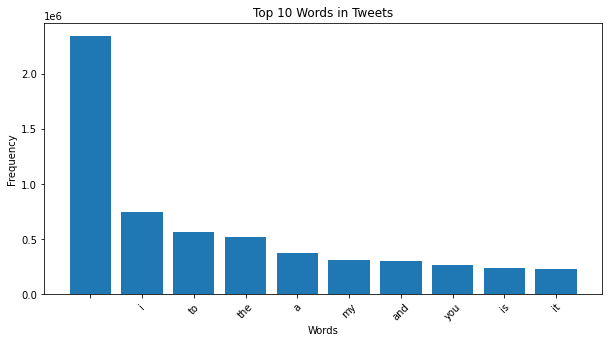

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import lower, split, explode, regexp_replace

# Preprocess the text data
df = df.withColumn("Tweet_Text", lower(df["Tweet_Text"]))  # Convert to lowercase
df = df.withColumn("Tweet_Text", regexp_replace(df["Tweet_Text"], r"[^a-z\s]", ""))  # Remove non-alphabetic characters
df = df.withColumn("Words", split(df["Tweet_Text"], " "))  # Split text into words

# Explode the array of words into separate rows
df = df.select("Words").withColumn("Word", explode(df["Words"]))

# Group by and count word frequencies
word_counts = df.groupBy("Word").count()

# Sort words by frequency
word_counts = word_counts.orderBy("count", ascending=False)

# Convert the result to a Pandas DataFrame for visualization
word_counts_pd = word_counts.toPandas()

# Display a bar chart of the top N most frequent words
top_N = 10  # Set the number of top words to display
plt.figure(figsize=(10, 5))
plt.bar(word_counts_pd["Word"][:top_N], word_counts_pd["count"][:top_N])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top {} Words in Tweets".format(top_N))
plt.xticks(rotation=45)
plt.show()

In [44]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.2 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773.9/773.9 KB 16.4 MB/s eta 0:00:00m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 KB 9.7 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [45]:
import nltk
from pyspark.sql.functions import lower, split, explode, regexp_replace, col

# Initialize NLTK and download the list of stopwords
nltk.download('stopwords')

from nltk.corpus import stopwords

# Define a list of NLTK stopwords
nltk_stopwords = set(stopwords.words('english'))

# Assuming you have a DataFrame 'df' with a column 'Tweet_Text'
# Preprocess the text data
df = df.withColumn("Tweet_Text", lower(df["Tweet_Text"]))  # Convert to lowercase
df = df.withColumn("Tweet_Text", regexp_replace(df["Tweet_Text"], r"[^a-z\s]", ""))  # Remove non-alphabetic characters
df = df.withColumn("Words", split(df["Tweet_Text"], " "))  # Split text into words

# Explode the array of words into separate rows
df = df.select("Words").withColumn("Word", explode(df["Words"]))

# Filter out NLTK stopwords
df = df.filter(~col("Word").isin(nltk_stopwords))

# Group by and count word frequencies
word_counts = df.groupBy("Word").count()

# Sort words by frequency
word_counts = word_counts.orderBy("count", ascending=False)


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to /home/hduser/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


AnalysisException: Cannot resolve column name "Tweet_Text" among (Words, Word)

In [ ]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover
from pyspark.sql import SparkSession

# Tokenize the "Tweet_Text" column
tokenizer = Tokenizer(inputCol="Tweet_Text", outputCol="words")
filtered_df = tokenizer.transform(filtered_df)

# Remove stopwords from the "words" column
stopwords_remover = StopWordsRemover(inputCol="words", outputCol="filtered_text")
filtered_df = stopwords_remover.transform(filtered_df)

# Show the modified DataFrame
filtered_df.show()

In [ ]:
result = filtered_df.select("filtered_text")

# Show the content of column "Tweet_Text"
result.show(truncate=False)